# Q1

![](HW2Q1.jpg)


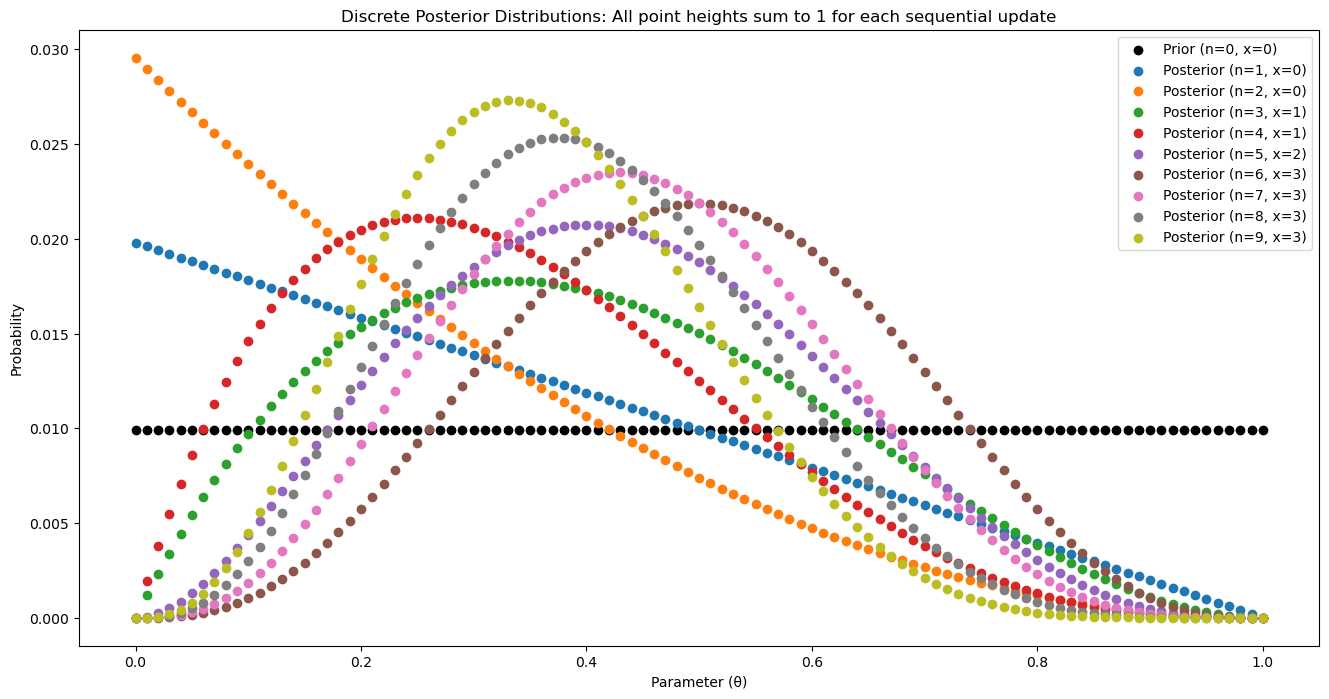

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define parameter space and uniform prior
parameter_domain = np.linspace(0, 1, 101)  # 101 discrete values of theta
prior = np.ones(101) / 101  # Uniform prior

# Observations: 0 for failure, 1 for success
observations = [0, 0, 1, 0, 1, 1, 0, 0, 0]

# Initialize counters
n, x = 0, 0

# Set up the plot
plt.figure(figsize=(16, 8))
plt.scatter(parameter_domain, prior, label=f"Prior (n={n}, x={x})", color='k')
plt.title("Discrete Posterior Distributions: All point heights sum to 1 for each sequential update")
plt.xlabel("Parameter (θ)")
plt.ylabel("Probability")

# Sequentially update the posterior for each observation
for observation in observations:
    n += 1  # Increment the number of trials
    x += observation  # Increment the number of successes
    
    # Compute the likelihood
    likelihood = stats.binom.pmf(observation, 1, parameter_domain)
    
    # Update posterior: Posterior ∝ Likelihood × Prior
    posterior = likelihood * prior
    posterior /= posterior.sum()  # Normalize to make it a proper probability distribution
    
    # Plot the updated posterior
    plt.scatter(parameter_domain, posterior, label=f"Posterior (n={n}, x={x})")
    
    # Update the prior for the next iteration
    prior = posterior

# Add legend and show the plot
plt.legend()
plt.show()


# Q2

![](HW2Q2.jpg)


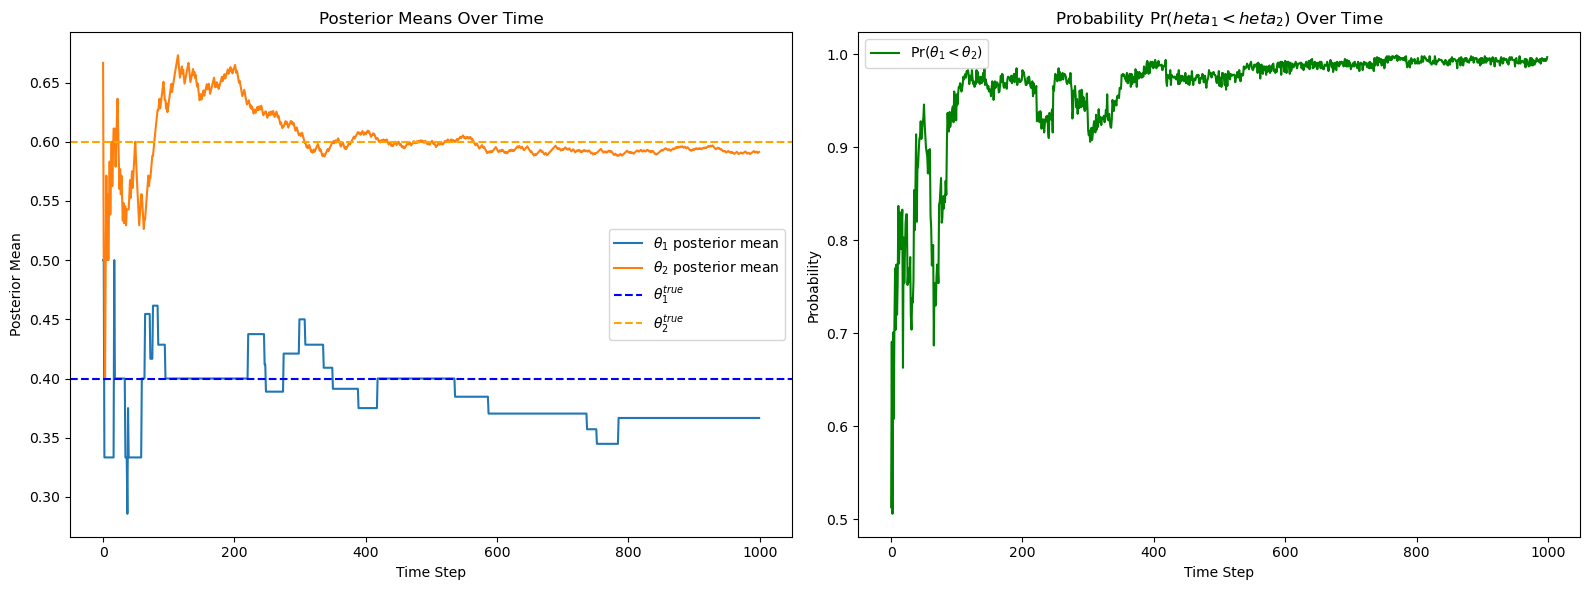

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# True probabilities for theta_1 and theta_2
theta1_true = 0.4
theta2_true = 0.6

# Prior parameters for Beta distributions
alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

# Initialize counters for trials and successes
n1, x1 = 0, 0
n2, x2 = 0, 0

# Number of iterations
m = 1000

# Store posterior estimates for visualization
theta1_posterior_means = []
theta2_posterior_means = []
prob_theta1_less_theta2 = []

for t in range(m):
    # Sample from current posterior distributions
    theta1_samples = np.random.beta(x1 + alpha1, n1 - x1 + beta1, size=1000)
    theta2_samples = np.random.beta(x2 + alpha2, n2 - x2 + beta2, size=1000)
    
    # Estimate P(theta1 < theta2)
    prob = np.mean(theta1_samples < theta2_samples)
    prob_theta1_less_theta2.append(prob)
    
    # Decide which coin to flip
    if np.random.rand() < prob:
        # Flip coin 2
        flip = np.random.rand() < theta2_true
        x2 += flip
        n2 += 1
    else:
        # Flip coin 1
        flip = np.random.rand() < theta1_true
        x1 += flip
        n1 += 1
    
    # Store posterior means for visualization
    theta1_posterior_means.append((x1 + alpha1) / (n1 + alpha1 + beta1))
    theta2_posterior_means.append((x2 + alpha2) / (n2 + alpha2 + beta2))

# Plot results
plt.figure(figsize=(16, 6))

# Posterior means
plt.subplot(1, 2, 1)
plt.plot(theta1_posterior_means, label=r'$\theta_1$ posterior mean')
plt.plot(theta2_posterior_means, label=r'$\theta_2$ posterior mean')
plt.axhline(theta1_true, color='blue', linestyle='--', label=r'$\theta_1^{true}$')
plt.axhline(theta2_true, color='orange', linestyle='--', label=r'$\theta_2^{true}$')
plt.xlabel('Time Step')
plt.ylabel('Posterior Mean')
plt.title('Posterior Means Over Time')
plt.legend()

# Probability of theta1 < theta2
plt.subplot(1, 2, 2)
plt.plot(prob_theta1_less_theta2, label=r'$\Pr(\theta_1 < \theta_2)$', color='green')
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.title('Probability $\Pr(\theta_1 < \theta_2)$ Over Time')
plt.legend()

plt.tight_layout()
plt.show()


# Q3

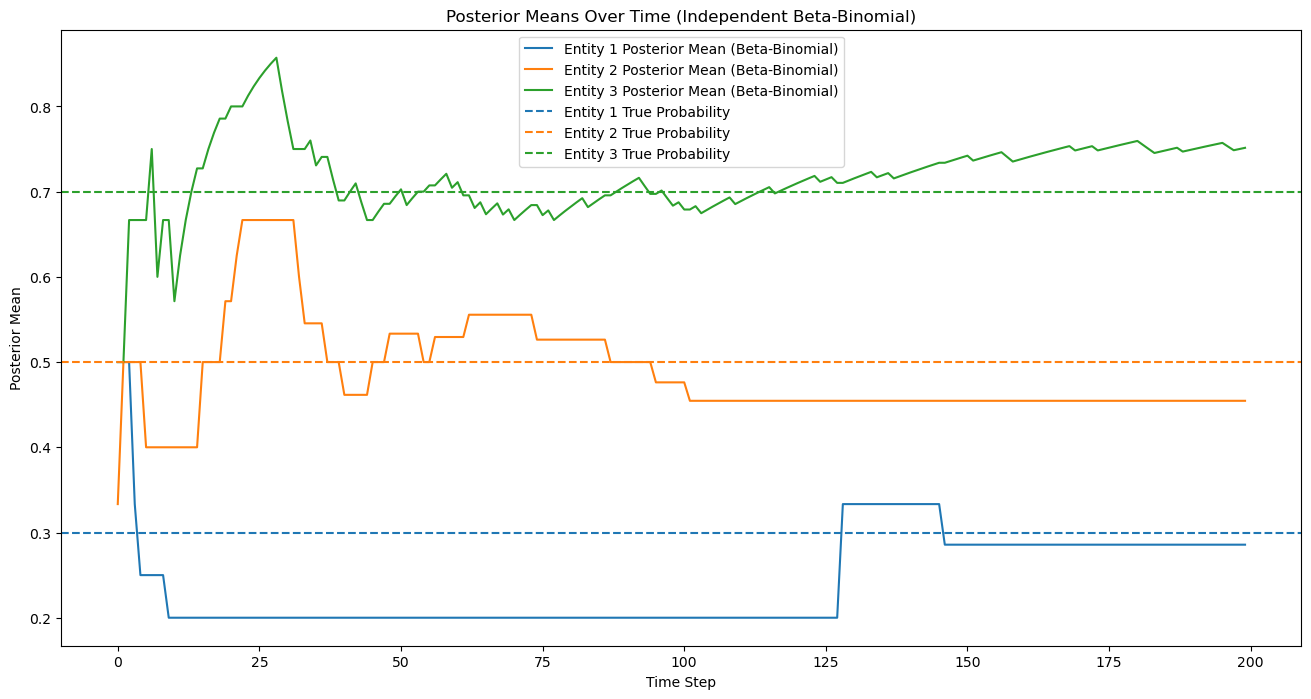

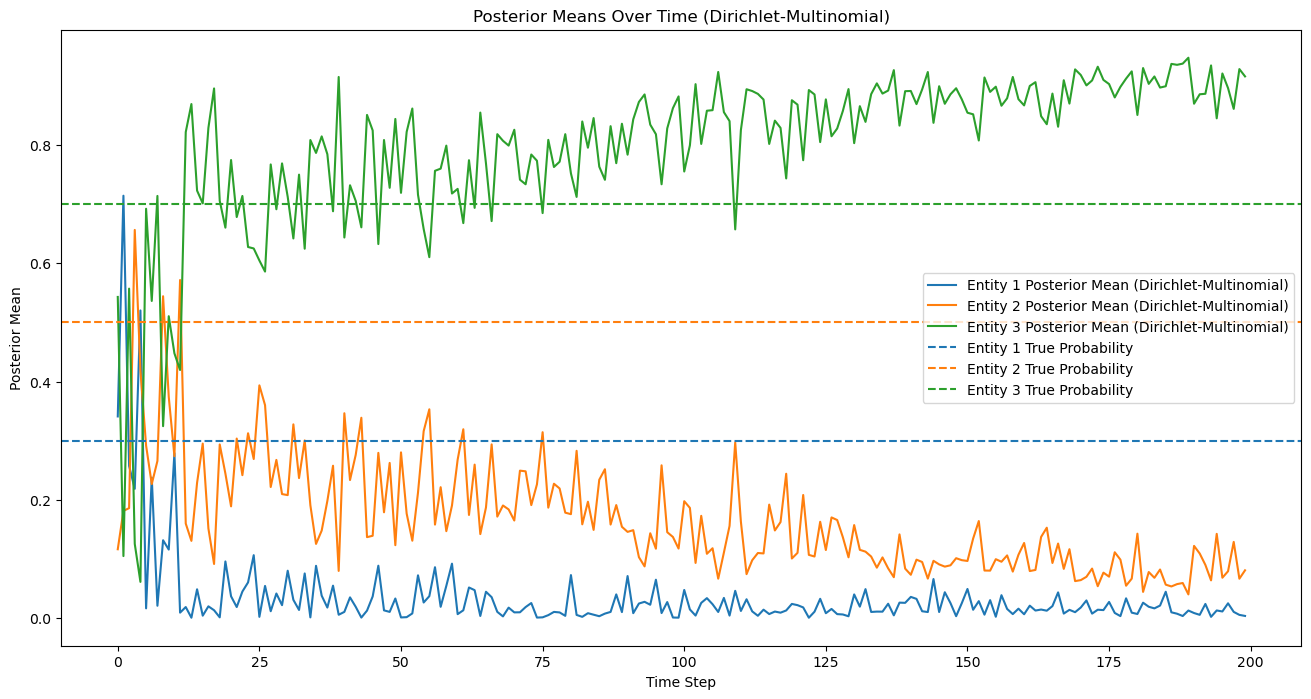

In [63]:
# Re-import necessary libraries after state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# Number of entities (arms)
k = 3

# True success probabilities for the entities (theta_1, theta_2, theta_3)
theta_true = [0.3, 0.5, 0.7]

# Beta-Binomial parameters for Analysis 1 (Independent Beta-Binomial)
alpha_beta = np.ones(k)  # Beta priors: alpha
beta_beta = np.ones(k)   # Beta priors: beta

# Dirichlet-Multinomial parameters for Analysis 2 (Joint Dirichlet-Multinomial)
alpha_dirichlet = np.ones(k)  # Dirichlet prior: uniform (symmetric)

# Counters for successes and trials
successes = np.zeros(k)
trials = np.zeros(k)

# Number of iterations
iterations = 200

# Tracking posterior means
posterior_means_beta = [[] for _ in range(k)]
posterior_means_dirichlet = []

# Run iterations
for t in range(iterations):
    # Sample from Beta-Binomial posteriors (Analysis 1)
    beta_samples = [np.random.beta(successes[i] + alpha_beta[i], trials[i] - successes[i] + beta_beta[i]) for i in range(k)]
    
    # Sample from Dirichlet posterior (Analysis 2)
    dirichlet_samples = dirichlet.rvs(alpha_dirichlet + successes)[0]
    
    # Decide which arm to pull (based on Beta-Binomial for simplicity)
    chosen_arm = np.argmax(beta_samples)
    
    # Simulate pulling the chosen arm
    success = np.random.rand() < theta_true[chosen_arm]
    trials[chosen_arm] += 1
    successes[chosen_arm] += success

    # Update posterior means for visualization
    for i in range(k):
        posterior_means_beta[i].append((successes[i] + alpha_beta[i]) / (trials[i] + alpha_beta[i] + beta_beta[i]))
    posterior_means_dirichlet.append(dirichlet_samples)

# Plot results with adjusted styles (solid lines for posterior means, dashed for true probabilities)
plt.figure(figsize=(16, 8))

# Posterior means for Analysis 1 (Independent Beta-Binomial)
for i in range(k):
    plt.plot(posterior_means_beta[i], label=f'Entity {i+1} Posterior Mean (Beta-Binomial)', linestyle='-')

# True probabilities
for i, theta in enumerate(theta_true):
    plt.axhline(theta, color=f'C{i}', linestyle='--', label=f'Entity {i+1} True Probability')

plt.title("Posterior Means Over Time (Independent Beta-Binomial)")
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()

# Posterior means for Analysis 2 (Joint Dirichlet-Multinomial)
plt.figure(figsize=(16, 8))
posterior_means_dirichlet = np.array(posterior_means_dirichlet)

for i in range(k):
    plt.plot(posterior_means_dirichlet[:, i], label=f'Entity {i+1} Posterior Mean (Dirichlet-Multinomial)', linestyle='-')

# True probabilities
for i, theta in enumerate(theta_true):
    plt.axhline(theta, color=f'C{i}', linestyle='--', label=f'Entity {i+1} True Probability')

plt.title("Posterior Means Over Time (Dirichlet-Multinomial)")
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean")
plt.legend()
plt.show()



## 1.Identifying Differences and Choosing the Best Approach
### Difference Between the Two Approaches

Independent Beta-Binomial Model:
>1.Treats each arm (or entity) independently.

>2.Each entity has its own Beta prior and updates based solely on its own observed data.

>3.No information sharing between entities.

Joint Dirichlet-Multinomial Model:

>1.Models all arms (or entities) jointly using a Dirichlet prior.

>2.Observations from one entity can influence the posterior of others due to shared information.

>3.Assumes some dependency or correlation between entities.

### Which Approach to Choose?

Choose Independent Beta-Binomial if:


>1.The entities are truly independent. For example, different versions of ads targeting different demographics.

>2.The data for each entity is large enough to estimate the success probabilities without needing shared information.

>3.Simpler to implement and computationally less intensive.

Choose Joint Dirichlet-Multinomial if:

>1.The entities are related or share underlying characteristics. For example, different page layouts targeting the same user base, where user behavior could affect all layouts similarly.

>2.The data for individual entities is sparse, and shared information can speed up learning.

## 2.Real-World AB Testing Context

A company wants to test three different homepage designs (A, B, and C) to maximize click-through rates (CTR) for a featured product.

All users are randomly assigned one of the three homepage designs when they visit the website. Users share similar behavior patterns, such as preferences for color schemes, layouts, or call-to-action buttons. The outcome for each user is binary: either they click the featured product (success) or they don’t (failure).

Since the user base is shared across all designs, there are overlapping behavioral patterns (e.g., user preferences for clean designs or easy navigation). A Dirichlet prior allows information sharing across the three designs, enabling faster learning of user preferences compared to treating each design independently. 